<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/DL_CNN_Image_Classification_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 Convolutional Neural Network (CNN) for Image Classification
✅ Dataset: Fashion MNIST ✅ Goal: Classify images into distinct clothing categories ✅ Approach: Train a CNN model with TensorFlow & Keras ✅ Evaluation: Accuracy, loss, confusion matrix, classification report

1️⃣ Setup & Import Libraries

First, we need essential Python libraries to handle images and build CNN models.

💡 What This Does?
✔ numpy → Handles numerical operations ✔ matplotlib & seaborn → Helps visualize data ✔ tensorflow & keras → Used to create CNN models ✔ fashion_mnist → Loads the Fashion MNIST dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist


2️⃣ Load & Explore the Dataset

Fashion MNIST contains 10 categories of clothing images (T-shirts, Shoes, Bags, etc.).

💡 What This Does?
✔ Loads dataset into training and test sets ✔ Shows sample images to understand data structure ✔ Fashion MNIST has grayscale images (28×28 pixels)

In [2]:
# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Check dataset shape
print("Training Data Shape:", X_train.shape)  # (60000, 28, 28)
print("Test Data Shape:", X_test.shape)  # (10000, 28, 28)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training Data Shape: (60000, 28, 28)
Test Data Shape: (10000, 28, 28)


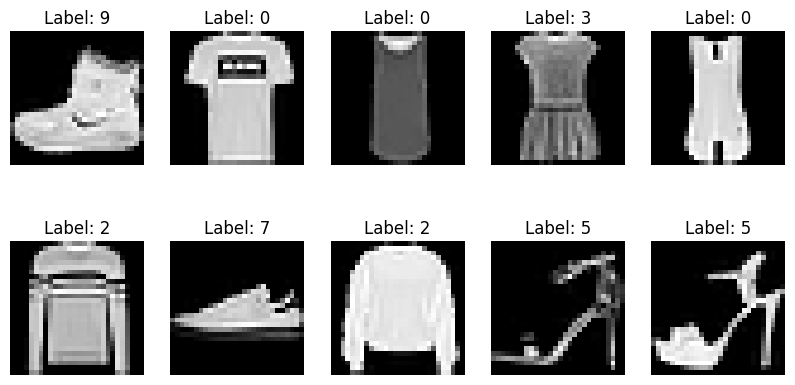

In [3]:
# 📌 Visualize Sample Images

# Display some images from the dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


3️⃣ Data Preprocessing

Before training, we need to normalize pixel values and reshape data for CNN input.

💡 What This Does?
✔ Normalizes pixel values → Helps the CNN learn better ✔ Reshapes images to add depth channel (1 for grayscale) ✔ One-hot encodes labels (e.g., T-Shirt → [0,1,0,0,0,0,0,0,0,0])

In [4]:
# Normalize pixel values (convert to 0-1 range)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data for CNN input (adding depth channel)
X_train = X_train.reshape(-1, 28, 28, 1)  # (60000, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)  # (10000, 28, 28, 1)

# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


4️⃣ Build CNN Model Architecture

Now, we design our CNN model with convolutional layers, pooling layers, and dense layers.

💡 What This Does?
✔ Conv2D layers extract features from images ✔ Pooling layers reduce image size while preserving important details ✔ Flatten layer converts image into a single vector ✔ Dense layers make final predictions (using softmax activation)


In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D(2,2),  # Pooling layer to reduce image size

    Conv2D(64, (3,3), activation="relu"),  # Second convolutional layer
    MaxPooling2D(2,2),

    Flatten(),  # Converts image data into a single vector
    Dense(128, activation="relu"),  # Fully connected layer
    Dropout(0.5),  # Helps prevent overfitting
    Dense(10, activation="softmax")  # Output layer for classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5️⃣ Compile & Train the Model

Now, we configure the optimizer, define the loss function, and train the CNN model.

💡 What This Does?
✔ Uses Adam optimizer for smooth learning ✔ Binary cross-entropy loss for classification ✔ Trains for 10 epochs (each cycle processes the full dataset)

In [6]:
# Compile model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.6974 - loss: 0.8299 - val_accuracy: 0.8548 - val_loss: 0.3957
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.8434 - loss: 0.4362 - val_accuracy: 0.8773 - val_loss: 0.3374
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - accuracy: 0.8618 - loss: 0.3774 - val_accuracy: 0.8860 - val_loss: 0.3094
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 30ms/step - accuracy: 0.8805 - loss: 0.3361 - val_accuracy: 0.8947 - val_loss: 0.2842
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.8883 - loss: 0.3072 - val_accuracy: 0.8917 - val_loss: 0.2897
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.8948 - loss: 0.2842 - val_accuracy: 0.8997 - val_loss: 0.2680
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9036 - loss: 0.2642 - val_accuracy: 0.9010 - val_loss: 0.2688
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9067 -

6️⃣ Evaluate the Model

Now, we test CNN performance on unseen data.

💡 What This Does?
✔ Evaluates final model performance ✔ Confusion Matrix shows correct vs. incorrect classifications

In [7]:
# Evaluate on test data

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9060 - loss: 0.2638
Test Accuracy: 0.91


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


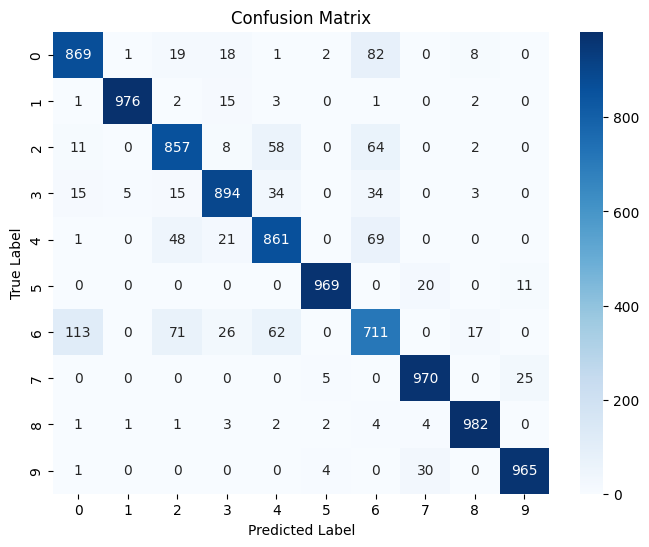

In [8]:
# 📌 Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


7️⃣ Hyperparameter Tuning

Try changing the CNN architecture or adjusting parameters.

📌 What to Tune?
✅ Learning rate → Adjust to improve accuracy ✅ Number of layers → More layers can extract more features ✅ Dropout rate → Helps prevent overfitting

In [9]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss="categorical_crossentropy", metrics=["accuracy"])
